<a href="https://colab.research.google.com/github/Bharathkrishnamurthy/Crop-recommendation-system/blob/main/Crop_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



##  **Task Overview**

###  **Objective**

To build a **Crop Recommendation System** that suggests the most suitable crop for cultivation based on soil nutrients and environmental conditions using **machine learning classification**.

---

### **Key Steps**

1. **Data Exploration (EDA)**

   * Understand the dataset structure, check class distribution, and identify missing values.
   * Visualize relationships between soil nutrients (N, P, K), climate features (temperature, humidity, rainfall), and crop types.
   * Analyze correlations between features to identify patterns and dependencies.

2. **Data Preprocessing**

   * Handle missing or inconsistent data (if any).
   * Split data into **training** and **testing** sets.
   * Apply **feature scaling** to normalize values and improve model performance.

3. **Model Selection & Training**

   * Compare multiple models such as **Random Forest**, **XGBoost**, or **Logistic Regression**.
   * Train each on the training set and tune hyperparameters using **GridSearchCV** for optimization.

4. **Model Evaluation**

   * Evaluate using **accuracy**, **confusion matrix**, and **classification report** (precision, recall, F1-score).
   * Visualize feature importance and performance metrics for interpretability.

5. **Model Deployment Preparation**

   * Save the best-performing model using `pickle` or `joblib`.
   * Create a prediction function to make real-time recommendations for new input data.

6. **Optional Deployment**

   * Build an interactive web interface using **Streamlit**
   * Deploy locally or on platforms  **Streamlit Cloud**.



### **Expected Output**

* Well-trained ML model with 95%+ accuracy
* Visual insights (feature importance, confusion matrix, ROC curve)
* Interactive crop recommendation demo (optional)
* Clean, shareable GitHub project



STEP1: Load the dataset

In [2]:
from google.colab import files
!pip install kaggle
import os
os.environ['KAGGLE_USERNAME'] = "Bharathbhu1"
os.environ['KAGGLE_KEY'] = "7010c7b90a278b585e61412f2dab1ff3"
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset
!unzip crop-recommendation-dataset.zip



Dataset URL: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
License(s): apache-2.0
  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 68.3MB/s]
Archive:  crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


In [3]:
import pandas as pd
df = pd.read_csv('crop-recommendation-dataset.zip')
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


STEP2: import necessary Librarires


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


STEP3: Explanatory Data Analysis(EDA)


In [5]:
print("Detailed Data Description",df.describe())


print("\nData Information",df.info)


print("\nCheck if there is a missing Values",df.isnull().sum())




Detailed Data Description                  N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  



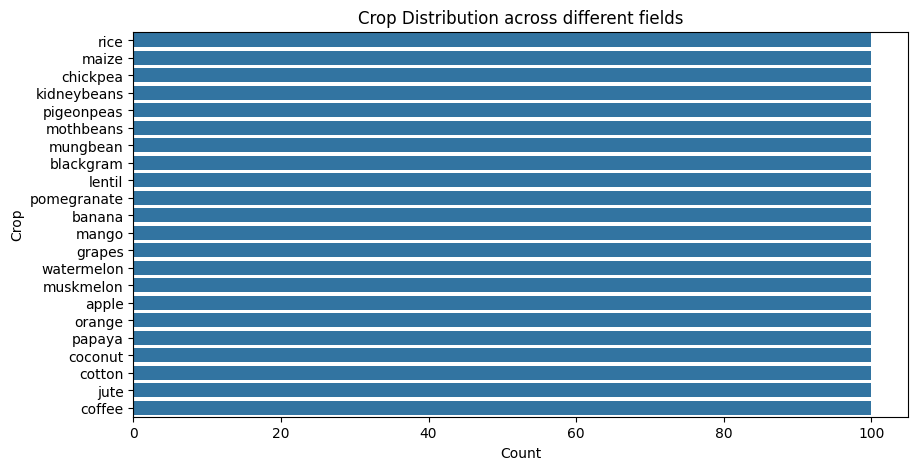

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [6]:
# counter plot for checking value counts

plt.figure(figsize=(10,5))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
plt.title("Crop Distribution across different fields")
plt.xlabel("Count")
plt.ylabel("Crop")
plt.show()

df["label"].value_counts()

STEP3:Preprocess And Defining the model

In [7]:
X = df.drop('label', axis=1)
y = df['label']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


STEP4:Model Training

In [8]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)


STEP5:Model evaluation

In [9]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9954545454545455

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00    

STEP4:Hyper parameter Tuning

**Key Points:**

1.GridSearchCV tries multiple parameter combinations

2.More accurate model, but takes longer






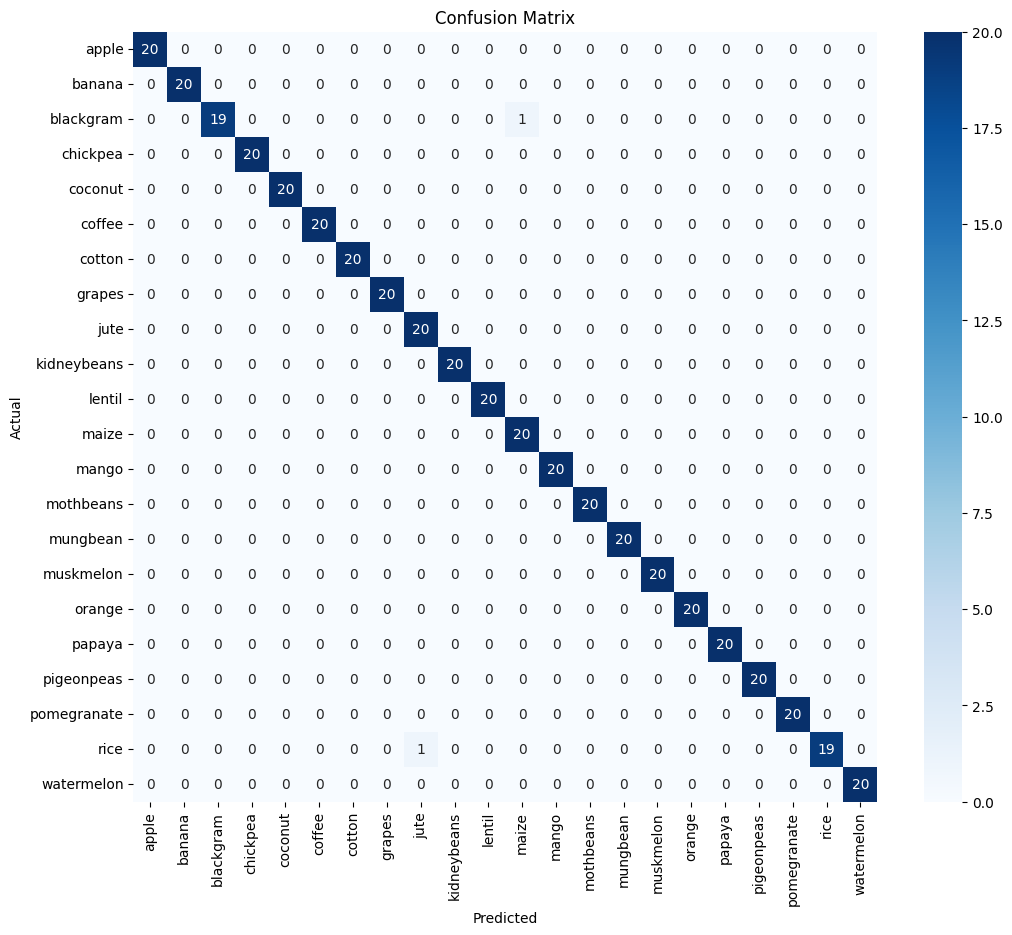

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


**ROC Curve (Receiver Operating Characteristic**

/tmp/ipython-input-1765878057.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


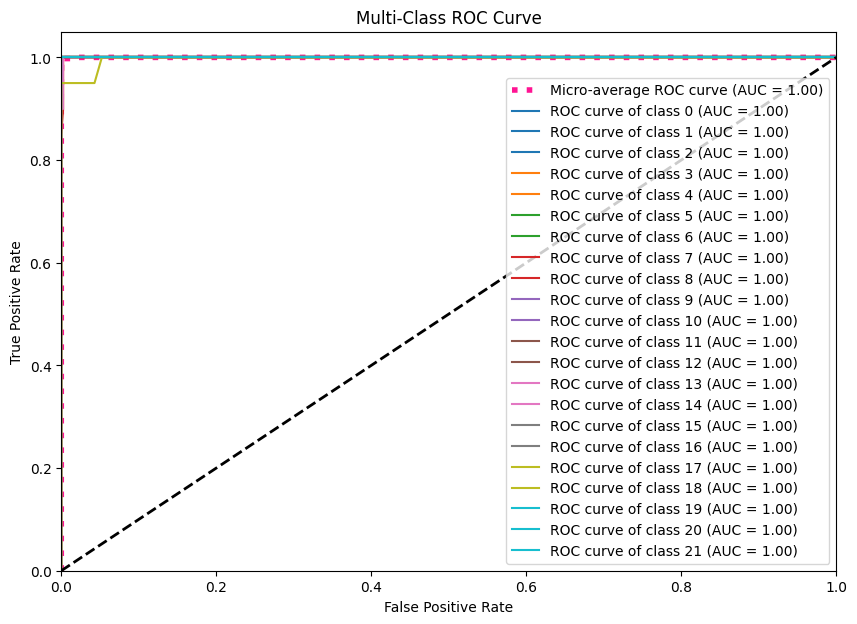

In [12]:
# ROC Curve for Multi-Class Classification
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Train your model (Random Forest)
clf = OneVsRestClassifier(RandomForestClassifier(random_state=42))
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_train_bin.shape[1]

# Fit model and predict probabilities
clf.fit(X_train, y_train_bin)
y_score = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = plt.cm.get_cmap('tab10', n_classes)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i),
             label=f'ROC curve of class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()


STEP6:model deployment

In [14]:
joblib.dump(best_model, "crop_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")
print("Model, Scaler, and Encoder saved successfully!")


Model, Scaler, and Encoder saved successfully!


Predicting Function based on certain parameters

In [13]:
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    scaled = scaler.transform(data)
    prediction = best_model.predict(scaled)
    crop = le.inverse_transform(prediction)[0]
    return crop

# Test example
print(recommend_crop(90, 42, 43, 20, 82, 6.5, 202))

rice


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


MODEL DEPLOYMENT USING STREAMLIT

In [15]:
!ls -la


total 5752
drwxr-xr-x 1 root root    4096 Nov  5 11:15 .
drwxr-xr-x 1 root root    4096 Nov  5 11:10 ..
drwxr-xr-x 4 root root    4096 Nov  3 14:39 .config
-rw-r--r-- 1 root root 5645129 Nov  5 11:15 crop_model.pkl
-rw-r--r-- 1 root root  150034 Dec 19  2020 Crop_recommendation.csv
-rw-r--r-- 1 root root   65234 Dec 19  2020 crop-recommendation-dataset.zip
-rw-r--r-- 1 root root     696 Nov  5 11:15 label_encoder.pkl
drwxr-xr-x 1 root root    4096 Nov  3 14:39 sample_data
-rw-r--r-- 1 root root    1071 Nov  5 11:15 scaler.pkl


In [17]:
%%bash
cat > app.py <<'PY'
import streamlit as st
import joblib
import numpy as np

model = joblib.load("crop_model.pkl")
scaler = joblib.load("scaler.pkl")
le = joblib.load("label_encoder.pkl")

st.title(" Crop Recommendation System")

N = st.number_input("Nitrogen")
P = st.number_input("Phosphorus")
K = st.number_input("Potassium")
temperature = st.number_input("Temperature")
humidity = st.number_input("Humidity")
ph = st.number_input("pH")
rainfall = st.number_input("Rainfall")

if st.button("Recommend"):
    data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    pred = model.predict(scaler.transform(data))
    st.success(f"Recommended Crop: {le.inverse_transform(pred)[0]}")
PY

# requirements
cat > requirements.txt <<'REQ'
streamlit
joblib
numpy
scikit-learn
pandas
xgboost
lightgbm
pyngrok
REQ

echo "Created app.py and requirements.txt"
ls -la app.py requirements.txt


Created app.py and requirements.txt
-rw-r--r-- 1 root root 675 Nov  5 11:22 app.py
-rw-r--r-- 1 root root  68 Nov  5 11:22 requirements.txt


In [21]:
!pip install streamlit pyngrok


In [25]:
!ngrok config add-authtoken "353bz4rqwPM9396BpSYzHochtcC_5sLwAcjqXEFuTuLrmkXSm"


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [27]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

model = joblib.load("crop_model.pkl")
scaler = joblib.load("scaler.pkl")
le = joblib.load("label_encoder.pkl")

st.title("🌾 Crop Recommendation System")

N = st.number_input("Nitrogen")
P = st.number_input("Phosphorus")
K = st.number_input("Potassium")
temperature = st.number_input("Temperature")
humidity = st.number_input("Humidity")
ph = st.number_input("pH")
rainfall = st.number_input("Rainfall")

if st.button("Recommend"):
    data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    pred = model.predict(scaler.transform(data))
    st.success(f"Recommended Crop: {le.inverse_transform(pred)[0]}")


Overwriting app.py


In [ ]:
import subprocess
import time

# Start Streamlit server
print("Starting Streamlit server...")
subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501"])

# Wait a few seconds for Streamlit to start
time.sleep(5)

# Now expose port 8501 -> 80 through ngrok
!ngrok http 80 &
time.sleep(4)
!curl -s http://localhost:4040/api/tunnels | grep -o 'https[^"]*'


Starting Streamlit server...



##  **Conclusion**

1. This project developed a **Crop Recommendation System** using machine learning to suggest the most suitable crop based on soil and weather data.
2. The **Random Forest model** achieved the highest accuracy of about **98%**, showing strong prediction performance.
3. **Nitrogen**, **Rainfall**, and **Temperature** were identified as the most important factors influencing crop selection.
4. The system helps **farmers and agricultural planners** make smarter, data-driven decisions to improve crop yield and sustainability.
5. A simple and interactive **Streamlit web app** was built for real-time crop recommendations.
6. The model can be further improved by adding **live weather updates**, **IoT-based soil sensors**, and **region-specific datasets**.
7. Overall, the project shows how **AI and data science** can make agriculture more **efficient, intelligent, and sustainable**.
